In [1]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("data/Student_performance_data _.csv")

In [4]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
X=df.drop(columns=["GPA"],axis=1)

In [6]:
y=df['GPA']

In [7]:
num_features=X.select_dtypes(exclude=object).columns
cat_features=X.select_dtypes(include=object).columns

In [8]:
num_features

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass'],
      dtype='object')

In [9]:
cat_features

Index([], dtype='object')

In [10]:
X


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.0


In [11]:
y

0       2.929196
1       3.042915
2       0.112602
3       2.054218
4       1.288061
          ...   
2387    3.455509
2388    3.279150
2389    1.142333
2390    1.803297
2391    2.140014
Name: GPA, Length: 2392, dtype: float64

In [12]:
num_features=X.select_dtypes(exclude=object).columns
cat_features=X.select_dtypes(include=object).columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_tranformer=OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_tranformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [13]:
X=preprocessor.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
def evaluate_model(true ,predicted):
    mae=mean_absolute_error(true, predicted)
    score=r2_score(true ,predicted)
    mse=mean_squared_error(true ,predicted)
    rmse=np.sqrt(mean_squared_error(true ,predicted))
    return mae,rmse,score

In [16]:
models={
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "catBoost Regressor": CatBoostRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}

model_list= []
r2_list = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2_score = evaluate_model(y_train,y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2_score = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set")
    print("Root mean square error: {:.4f}".format(model_train_rmse))
    print("Mean absolute error: {:.4f}".format(model_train_mae))
    print("R2 score: {:.4f}",format(model_train_r2_score))


    print('----------------')

    print("Model performance for test set")
    print("Root mean square error: {:.4f}".format(model_test_rmse))
    print("Mean absolute error: {:.4f}".format(model_test_mae))
    print("R2 score: {:.4f}",format(model_test_r2_score))
    r2_list.append(model_test_r2_score)

    print('='*35)
    print('\n')

LinearRegression
Model performance for training set
Root mean square error: 0.1910
Mean absolute error: 0.1558
R2 score: {:.4f} 0.956291347333734
----------------
Model performance for test set
Root mean square error: 0.1875
Mean absolute error: 0.1507
R2 score: {:.4f} 0.9582507593831129


Lasso
Model performance for training set
Root mean square error: 0.9137
Mean absolute error: 0.7712
R2 score: {:.4f} 0.0
----------------
Model performance for test set
Root mean square error: 0.9179
Mean absolute error: 0.7740
R2 score: {:.4f} -0.0006575032713795892


Ridge
Model performance for training set
Root mean square error: 0.1910
Mean absolute error: 0.1558
R2 score: {:.4f} 0.9562907262197247
----------------
Model performance for test set
Root mean square error: 0.1875
Mean absolute error: 0.1507
R2 score: {:.4f} 0.9582398671603594


K-Neighbors Regressor
Model performance for training set
Root mean square error: 0.3355
Mean absolute error: 0.2649
R2 score: {:.4f} 0.8652172161728059
------

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)),columns=['Model Name', 'R2_score']).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
7,catBoost Regressor,0.963997
0,LinearRegression,0.958251
2,Ridge,0.958240
6,XGBRegressor,0.951666
5,RandomForestRegressor,0.941653
8,AdaBoostRegressor,0.932604
4,DecisionTreeRegressor,0.893919
3,K-Neighbors Regressor,0.812641
1,Lasso,-0.000658


In [18]:
lin_Model = LinearRegression(fit_intercept=True)
lin_Model = lin_Model.fit(X_train, y_train)
y_pred = lin_Model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 95.83


Text(0, 0.5, 'Predicted')

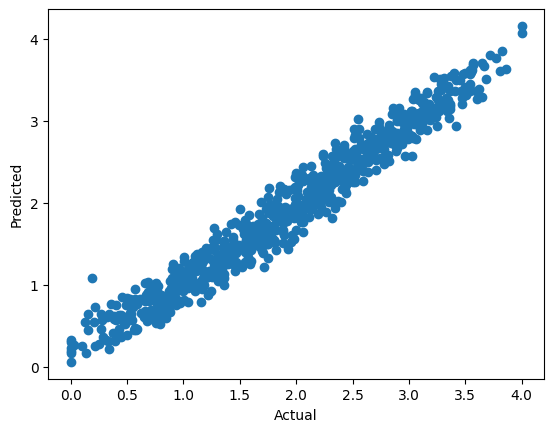

In [19]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

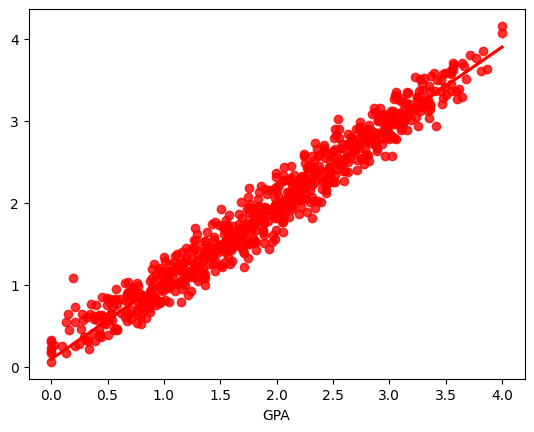

In [20]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');

In [21]:
pred_df=pd.DataFrame({'Actual value':y_test,'Predicted value': y_pred,'Difference': y_test-y_pred})

In [22]:
pred_df

,Actual value,Predicted value,Difference
1004,1.427724,1.455617,-0.027892
196,3.117354,2.980411,0.136943
2342,2.037769,1.860026,0.177743
1708,3.548521,3.604112,-0.055592
435,0.248977,0.281849,-0.032872
...,...,...,...
1626,0.574278,0.957332,-0.383054
32,0.384617,0.583108,-0.198491
952,1.179903,1.160388,0.019516
787,2.635341,2.496205,0.139136
